Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 4**: The code in the cell below has errors. There are errors in style and errors preventing the code to run as intended. 

Your **task** is to find all mistakes, remove them, make the code function properly such that it presents a correct figure at the end and achieves a 10 out of 10 marks from the style checker. 

It is strongly recommended to start the exercise by copying the entire code to a separate python file and examine it in Spyder. The code checking should then improve your style mark.

**Note A**: Leave the function names unchanged. Some may be assumed in tests. Constant values as given are all correct.

**Note B**: Make sure you use the `pylintrc` file from Moodle for style checking (keep it in the same folder as your python file in Spyder so that style checking in Spyder automatically uses it as configuration file).

**Note C**: Copy your final solution back into the cell below so that the tests can run.

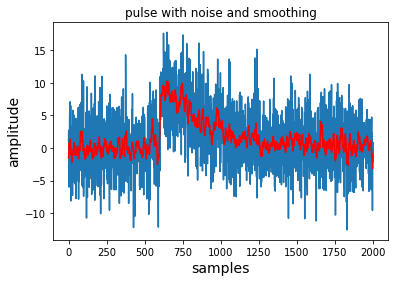

In [1]:
'''
Use moving average filter for a simple but noisy pulse

This example contains programming faults!
'''

import numpy as np
import matplotlib.pyplot as plt

def moving_average(inputdata, filterorder):
    ''' implement a moving average filter of odd order
        inputdata: to be filtered, NumPy array
        filterorder: integer number as filter order,
                     must be made odd if even, i.e. even+1.
    '''
    if filterorder % 2 == 0:
        filterorder+=1
    response = 1 / filterorder  # a float normalization factor
    output = []

    # padding the input for averaging data borders
    leftextension = np.flip(inputdata[:filterorder // 2], 0)
    rightextension = np.flip(inputdata[-filterorder // 2 + 1:], 0)
    padded = np.concatenate([leftextension, inputdata, rightextension])

    output.append(np.sum(padded[:filterorder]) * response) # first average
    n = filterorder // 2 + 1
    for idx in range(n, len(inputdata) + n - 2):
        term = output[-1]  # previous
        term += padded[idx + filterorder // 2] * response
        term -= padded[idx - filterorder // 2 - 1] * response
        output.append(term)
    return np.array(output)

def simple_pulse(length, amplitude, risetime, decaytime):
    '''Simple Pulse function'''
    time = np.linspace(0, length, length + 1)
    onset = 0.3 * length # start 30% into the length
    pulse = np.exp(-(time - onset)/risetime) - np.exp(-(time - onset)/decaytime)
    pulse[np.where(time < onset)] = 0.0 # not defined before onset time, set 0
    return -amplitude * pulse

# make the data
amp = 10.0
risetime_ = 3.0
decaytime_ = 300.0
data = simple_pulse(2000, amp, risetime_, decaytime_)
noisy = data + 0.4 * amp * np.random.normal(size = len(data))

# filter and plot
smooth = moving_average(noisy, 12)
plt.plot(noisy)
plt.plot(smooth, 'r-')
plt.title('pulse with noise and smoothing')
plt.ylabel('amplitude', fontsize = 14)
plt.xlabel('samples', fontsize = 14)
plt.show()


In [2]:
# test
data = np.array([0.0, 0.0, 1.0, 2.0, 1.0, 0.0, 0.0])
smooth = moving_average(data, 2)
assert (smooth[2]==1.0)

### Tests - 1 mark; Style - 1 mark; Plot - 1 mark